# With some French towns

In [1]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="eric2mangel@gmail.com")


In [2]:
import pandas as pd
villes = ["Dunkerque", "Brest", "Paris", "Strasbourg", "Lyon", "Toulouse",
          "Marseille", "Nice", "Perpignan"]

latlong = []

for i in villes:
    # Get latitude and longitude
    loc = geolocator.geocode(i+',' + "France")
    latlong.append((loc.latitude, loc.longitude))

latlong


[(51.0347708, 2.3772525),
 (48.3905283, -4.4860088),
 (48.8588897, 2.3200410217200766),
 (48.584614, 7.7507127),
 (45.7578137, 4.8320114),
 (43.6044622, 1.4442469),
 (43.2961743, 5.3699525),
 (43.7009358, 7.2683912),
 (42.6985304, 2.8953121)]

In [3]:
table_villes = pd.DataFrame(index=villes, columns=['LAT', 'LONG'],
                            data=latlong)

In [4]:
table_villes.head()

,LAT,LONG
Dunkerque,51.034771,2.377252
Brest,48.390528,-4.486009
Paris,48.858890,2.320041
Strasbourg,48.584614,7.750713
Lyon,45.757814,4.832011


In [5]:
distances = pd.DataFrame(columns=villes,index=villes)

In [6]:
from geopy.distance import geodesic 
for nr,row in enumerate(villes):
    for nc,col in enumerate(villes):
        distances.loc[row,col] = geodesic(latlong[nr], latlong[nc]).km

In [7]:
distances

,Dunkerque,Brest,Paris,Strasbourg,Lyon,Toulouse,Marseille,Nice,Perpignan
Dunkerque,0,575.429,242.054,472.945,614.205,829.066,889.549,894.654,927.559
Brest,575.429,0,504.266,903.822,765.2,702.446,951.019,1046.88,855.073
Paris,242.054,504.266,0,400.657,393.576,587.943,661.648,688.259,686.16
Strasbourg,472.945,903.822,400.657,0,384.286,737.229,616.037,544.115,755.452
Lyon,614.205,765.2,393.576,384.286,0,359.665,276.864,299.128,373.468
Toulouse,829.066,702.446,587.943,737.229,359.665,0,319.568,469.874,155.11
Marseille,889.549,951.019,661.648,616.037,276.864,319.568,0,159.989,212.425
Nice,894.654,1046.88,688.259,544.115,299.128,469.874,159.989,0,372.412
Perpignan,927.559,855.073,686.16,755.452,373.468,155.11,212.425,372.412,0


In [8]:
from sklearn import manifold
# MDS
mds = manifold.MDS(n_components=2, random_state=1, dissimilarity="precomputed")
mds.fit(distances)
D = distances.copy()
# coordinates of the points in the plane since (n_components = 2)
points = mds.embedding_
print(points)


[[-110.82184579  523.34939751]
 [ 458.29473908  443.2960764 ]
 [ -24.38272563  297.44763264]
 [-394.17774586  143.97904485]
 [ -89.76857114  -90.59445234]
 [ 243.47105666 -225.99616651]
 [ -45.01566692 -363.76269056]
 [-205.07438532 -366.4540785 ]
 [ 167.47514492 -361.26476349]]


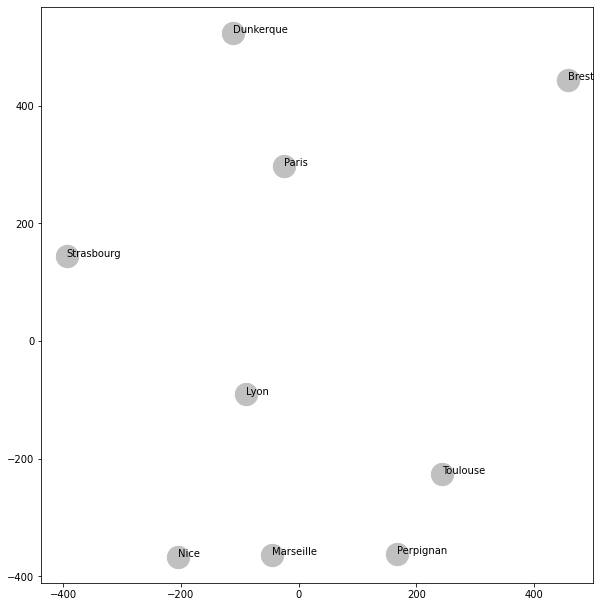

In [9]:
import matplotlib.pyplot as plt
ax = plt.axes([0, 0, 2, 2])
ax.set_aspect(aspect='equal')
plt.scatter(points[:, 0], points[:, 1], color='silver', s=500)
for i in range(D.shape[0]):
    ax.annotate(D.index[i], (points[i, 0], points[i, 1]), color='black')
plt.show()


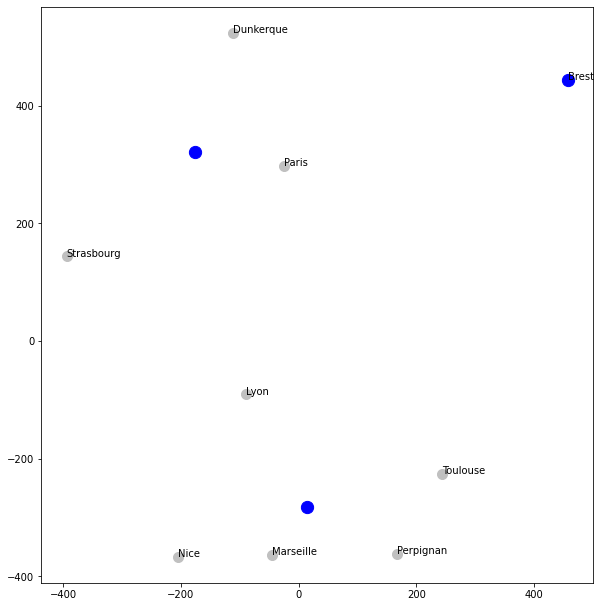

In [10]:
#En bonus un k-means par ville
#K-means
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,random_state=1)
#modélisation
km.fit(points)

#graphique avec les barycentres
ax = plt.axes([0,0,2,2])
ax.set_aspect(aspect='equal')
plt.scatter(points[:,0],points[:,1],color='silver',s=100)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',s=150)
#ajouter les étiquettes dans le graphique
for i in range(D.shape[0]):
 ax.annotate(D.index[i],(points[i,0],points[i,1]),color='black')
plt.show()

[0.44219449 0.4117198  0.31672421 0.31592695 0.30842561 0.21125527
 0.08717297]


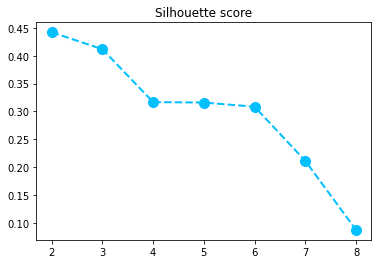

In [11]:
import numpy as np
from sklearn.metrics import silhouette_score
nb = 7
sil = np.zeros(nb)
for K in range(2, nb+2):
    kms = KMeans(n_clusters=K, random_state=1).fit(points)
    sil[K-2] = silhouette_score(points, kms.labels_, metric='euclidean')
# Silhouette score
print(sil)
plt.plot(range(2, nb+2), sil, '--o', color='deepskyblue',
         linewidth=2, markersize=10)
plt.title('Silhouette score')
plt.show()

In [15]:
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=go.Scattergeo(lon=table_villes['LONG'],
                lat=table_villes['LAT'],
                text=table_villes.index,
                mode='markers',
                marker_color=table_villes['LAT'],
                ))

fig.update_layout(title='French towns',
                  geo_scope='europe',
                  )
fig.show()